Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


Cargar datos en dataframe

In [2]:
df_clientes = pd.read_csv("datos.csv")
df_clientes.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,clientecat
0,2,13,44,1,9,64000,4,5,0.0,0,2,1
1,3,11,33,1,7,136000,5,5,0.0,0,6,4
2,3,68,52,1,24,116000,1,29,0.0,1,2,3
3,2,33,33,0,12,33000,2,0,0.0,1,1,1
4,2,23,30,1,9,30000,1,2,0.0,0,4,3


Agrupar clientes
1- Servicio Básico 2- Servicio enlinea 3- Servicio Premium y 4- Servicio Completo

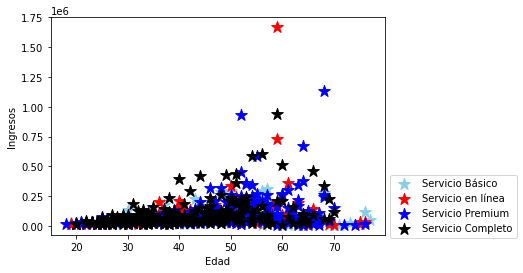

In [3]:
clases = ["Servicio Básico", "Servicio en línea","Servicio Premium","Servicio Total"]

clientes_Servicio_Basico = df_clientes[df_clientes["clientecat"]==1]
clientes_Servicio_en_linea = df_clientes[df_clientes["clientecat"]==2]
clientes_Servicio_Premium = df_clientes[df_clientes["clientecat"]==3]
clientes_Servicio_Completo = df_clientes[df_clientes["clientecat"]==4]

plt.scatter(clientes_Servicio_Basico["age"], 
            clientes_Servicio_Basico["income"],
            marker="*", 
            s=150, 
            color="skyblue",
            label="Servicio Básico")

plt.scatter(clientes_Servicio_en_linea["age"], 
            clientes_Servicio_en_linea["income"],
            marker="*", 
            s=150, 
            color="red", 
            label="Servicio en línea")

plt.scatter(clientes_Servicio_Premium["age"], 
            clientes_Servicio_Premium["income"],
            marker="*", 
            s=150, 
            color="blue", 
            label="Servicio Premium")

plt.scatter(clientes_Servicio_Completo["age"], 
            clientes_Servicio_Completo["income"],
            marker="*", 
            s=150, 
            color="black", 
            label="Servicio Completo")


plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.legend(bbox_to_anchor=(1, 0.3)) 
plt.show()            

Preparar datos y crear clasificador KNN (3)

In [4]:
datos = df_clientes[["age","income"]]
clase = df_clientes["clientecat"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos.values)


clasificador = KNeighborsClassifier(n_neighbors=4)
clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=4)

Probar el modelo con un nuevo cliente

Clase: Servicio en línea
Probabilidades por clase [[0.25 0.5  0.25 0.  ]]


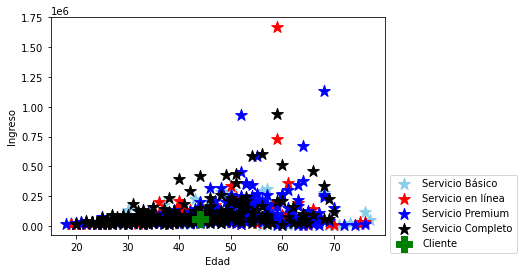

In [5]:
edad = 44
ingresos = 62000

#Escalar los datos del nuevo cliente
solicitante = escalador.transform([[edad, ingresos]])

#Calcular clase y probabilidades

print("Clase:", clases[clasificador.predict(solicitante)[0]-1])
print("Probabilidades por clase", clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(clientes_Servicio_Basico["age"], 
            clientes_Servicio_Basico["income"],
            marker="*", 
            s=150, 
            color="skyblue",
            label="Servicio Básico")

plt.scatter(clientes_Servicio_en_linea["age"], 
            clientes_Servicio_en_linea["income"],
            marker="*", 
            s=150, 
            color="red", 
            label="Servicio en línea")

plt.scatter(clientes_Servicio_Premium["age"], 
            clientes_Servicio_Premium["income"],
            marker="*", 
            s=150, 
            color="blue", 
            label="Servicio Premium")

plt.scatter(clientes_Servicio_Completo["age"], 
            clientes_Servicio_Completo["income"],
            marker="*", 
            s=150, 
            color="black", 
            label="Servicio Completo")

plt.scatter(edad,ingresos, marker="P", s=250, color="green", label="Cliente") 
plt.ylabel("Ingreso")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show() #(ejecutar)